# **Treadmill Customer Profile and Probability Analysis**


**Business Problem:**

The market research team wants to identify the characteristics of the target audience for each type of treadmill offered by the company to provide better recommendations for new customers. The team aims to investigate whether there are differences across the products concerning customer characteristics.

**Dataset:**

The company collected data on individuals who purchased treadmills from the company's product range during the prior three months. The dataset includes the following features:

- Product Purchased: KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- Marital Status: Single or partnered
- Usage: The average number of times the customer plans to use the treadmill each week.
- Income: Annual income (in $)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 represents poor shape and 5 indicates excellent shape.
- Miles: The average number of miles the customer expects to walk/run each week

Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1500.
- The KP481 is for mid-level runners and sells for $1,750.
- The KP781 treadmill has advanced features and sells for $2,500.

# **Problem Statement:**
A leading fitness equipment brand is looking to enhance customer recommendations for its treadmill products (KP281, KP481, KP781). The objective is to identify distinct customer profiles for each treadmill type to provide more targeted suggestions to new customers. The market research team aims to investigate if there are variations in customer characteristics across these treadmill products.

In [1]:
# import all important libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
#import the data set
data_path="aerofit_treadmill.txt"
data=pd.read_csv(data_path)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df=pd.DataFrame(data)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
# check for number of rows and column in dataframe
print("rows:",df.shape[0],"column:",df.shape[1])

rows: 180 column: 9


In [5]:
# total number of elements in dataframe
df.size

1620

In [6]:
#all column name
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
#dataframe information (column_name,data type of column,memory useages,range)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
#finding null values
df.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [9]:
#checking for how many null values in all column
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

dataframe don't have any null values

In [10]:
#data types of column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [11]:
#finding unique values in columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [12]:
#check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [13]:
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


there are no duplicate values in dataset

[34]


In [14]:
#describe the quantitive data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [15]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [16]:
df.describe(include="object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Dataset ovservation:**  


1. The dataset is free from both null values and duplicate entries, ensuring data integrity.

2. Within the dataset, three distinct types of products are present.

3. The product "KP281" stands out as the most frequently used among all products in the dataset.

4. Gender distribution in the dataset consists of 104 males and 76 females.

5. Marital status information reveals that 107 individuals are married, while 73 individuals are single.

6. When examining age statistics, it becomes apparent that the age range spans from 18 to 50 years. The average age of the individuals in the dataset is 28.79 years, and 75% of the individuals have an age of 33 or below.

7. Education levels across the dataset are uniform, with each person having completed 12 years of education. Notably, 75% of the individuals have received 16 years of education or less, though some individuals have attained up to 21 years of education.

8. The variables "income" and "miles" exhibit notably high standard deviations, indicating potential outliers within their distributions.

In [17]:
#first 10 rows of dataframe
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


 **Non-Graphical Analysis: Value counts and unique attributes**

**value counts and unique attributes of Product**

In [18]:
print("Unique values:",df["Product"].unique())
print("Number of unique values:",df["Product"].nunique())
print("count of unique values:",df["Product"].value_counts())

Unique values: ['KP281' 'KP481' 'KP781']
Number of unique values: 3
count of unique values: KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


In [19]:
print("Unique values:",df["Gender"].unique())
print("Number of unique values:",df["Gender"].nunique())
print("count of unique values:",df["Gender"].value_counts())

Unique values: ['Male' 'Female']
Number of unique values: 2
count of unique values: Male      104
Female     76
Name: Gender, dtype: int64


In [ ]:
print("Unique values:",df["Age"].unique())
print("Number of unique values:",df["Age"].nunique())
print("count of unique values:",df["Age"].value_counts())

Unique values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Number of unique values: 32
count of unique values: 25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64


In [20]:
print("Unique values:",df["Education"].unique())
print("Number of unique values:",df["Education"].nunique())
print("count of unique values:",df["Education"].value_counts())

Unique values: [14 15 12 13 16 18 20 21]
Number of unique values: 8
count of unique values: 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64


In [21]:
print("Unique values:",df["MaritalStatus"].unique())
print("Number of unique values:",df["MaritalStatus"].nunique())
print("count of unique values:",df["MaritalStatus"].value_counts())

Unique values: ['Single' 'Partnered']
Number of unique values: 2
count of unique values: Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [22]:
print("Unique values:",df["Usage"].unique())
print("Number of unique values:",df["Usage"].nunique())
print("count of unique values:",df["Usage"].value_counts())

Unique values: [3 2 4 5 6 7]
Number of unique values: 6
count of unique values: 3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64


In [23]:
print("Unique values:",df["Fitness"].unique())
print("Number of unique values:",df["Fitness"].nunique())
print("count of unique values:",df["Fitness"].value_counts())

Unique values: [4 3 2 1 5]
Number of unique values: 5
count of unique values: 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


In [24]:
print("Unique values:",df["Income"].unique())
print("Number of unique values:",df["Income"].nunique())
print("count of unique values:",df["Income"].value_counts())

Unique values: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Number of unique values: 62
count of unique values: 45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64


In [25]:
print("Unique values:",df["Miles"].unique())
print("Number of unique values:",df["Miles"].nunique())
print("count of unique values:",df["Miles"].value_counts())

Unique values: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]
Number of unique values: 37
count of unique values: 85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64


## **Visual Analysis:**

## **Finding outliers using Boxplot**

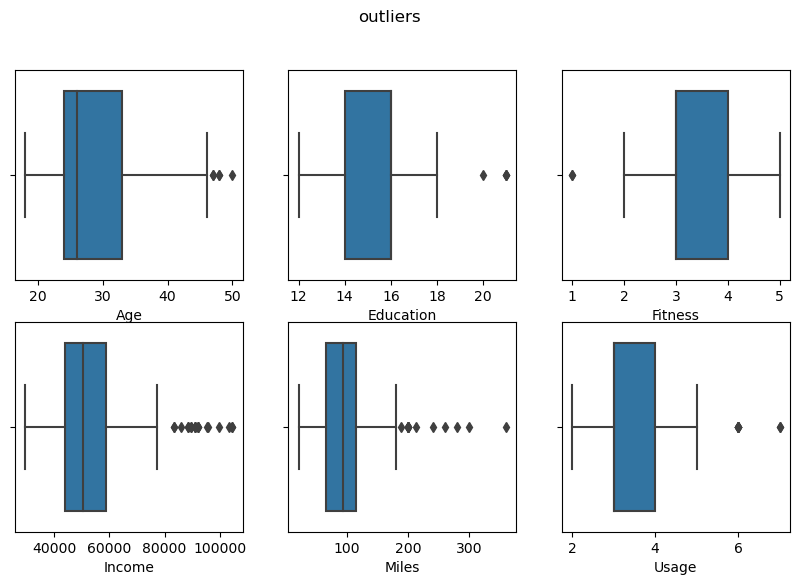

In [26]:
fig,ax=plt.subplots(2,3,figsize=(10,6))
fig.suptitle("outliers")

plt.subplot(2,3,1)
sns.boxplot(data=df,x="Age")

plt.subplot(2,3,2)
sns.boxplot(data=df,x="Education")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Fitness")

plt.subplot(2,3,4)
sns.boxplot(data=df,x="Income")

plt.subplot(2,3,5)
sns.boxplot(data=df,x="Miles")

plt.subplot(2,3,6)
sns.boxplot(data=df,x="Usage")
plt.show()



**Insights:** Based on the graphical representation, it is evident that both Income and Miles exhibit a substantial number of outliers. In contrast, the remaining variables display only a minor presence of outliers.






## **Univariate Analysis:**

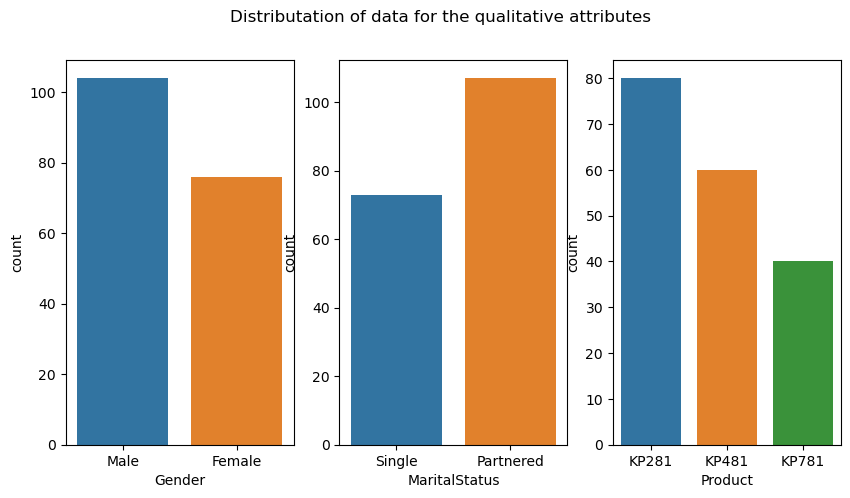

In [27]:
#Distributation of data for the qualitative attributes
fig,ax=plt.subplots(1,3,figsize=(10,5))
fig.suptitle("Distributation of data for the qualitative attributes")

plt.subplot(1,3,1)
sns.countplot(data=df,x="Gender",)

plt.subplot(1,3,2)
sns.countplot(data=df,x="MaritalStatus")

plt.subplot(1,3,3)
sns.countplot(data=df,x="Product")
plt.show()





**Insights:** In the given data, there appears to be a higher number of male customers compared to female customers. Additionally, it seems that partnered customers are more prevalent. Furthermore, it is evident that the product KP281 is the most frequently purchased by customers.

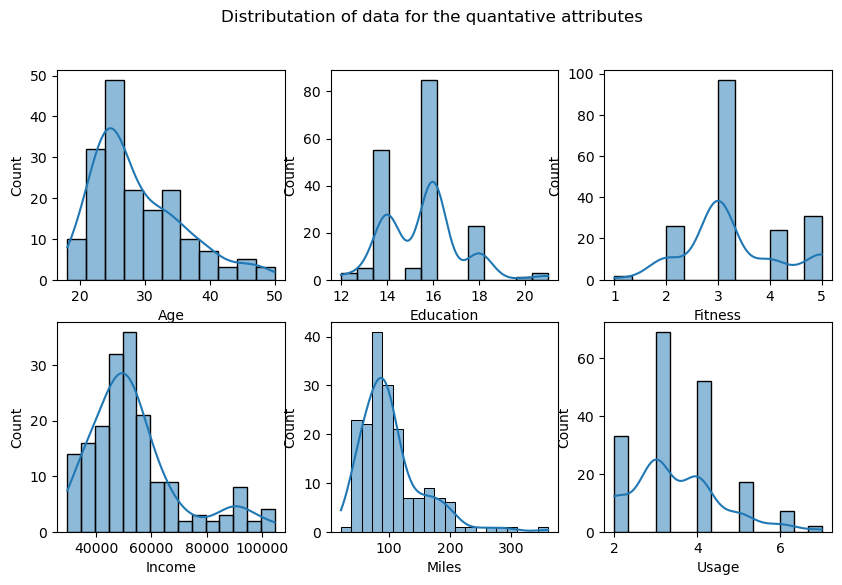

In [28]:
#Distributation of data for the quantative attributes
fig,ax=plt.subplots(2,3,figsize=(10,6))
fig.suptitle("Distributation of data for the quantative attributes")

plt.subplot(2,3,1)
sns.histplot(data=df,x="Age",kde=True)

plt.subplot(2,3,2)
sns.histplot(data=df,x="Education",kde=True)

plt.subplot(2,3,3)
sns.histplot(data=df,x="Fitness",kde=True)

plt.subplot(2,3,4)
sns.histplot(data=df,x="Income",kde=True)

plt.subplot(2,3,5)
sns.histplot(data=df,x="Miles",kde=True)

plt.subplot(2,3,6)
sns.histplot(data=df,x="Usage",kde=True)

plt.show()



## **Bivariate Analysis**

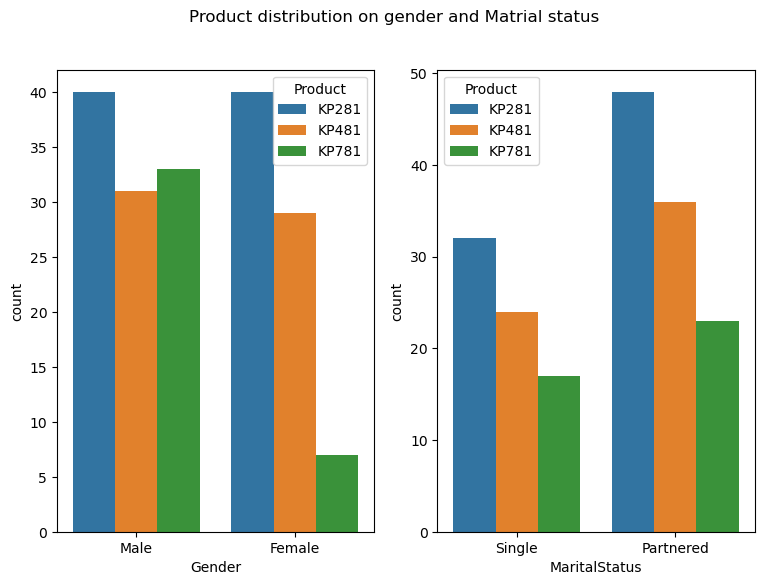

In [29]:
#Product distribution on gender and Matrial status
fig,ax=plt.subplots(1,2,figsize=(9,6))
fig.suptitle("Product distribution on gender and Matrial status")

plt.subplot(1,2,1)
sns.countplot(data=df,x="Gender",hue="Product")

plt.subplot(1,2,2)
sns.countplot(data=df,x="MaritalStatus",hue="Product")

plt.show()


**Insights:**While both males and females do use KP281, KP781 is predominantly utilized by males. The usage of KP781 among males is notably higher compared to its relatively limited usage among females.

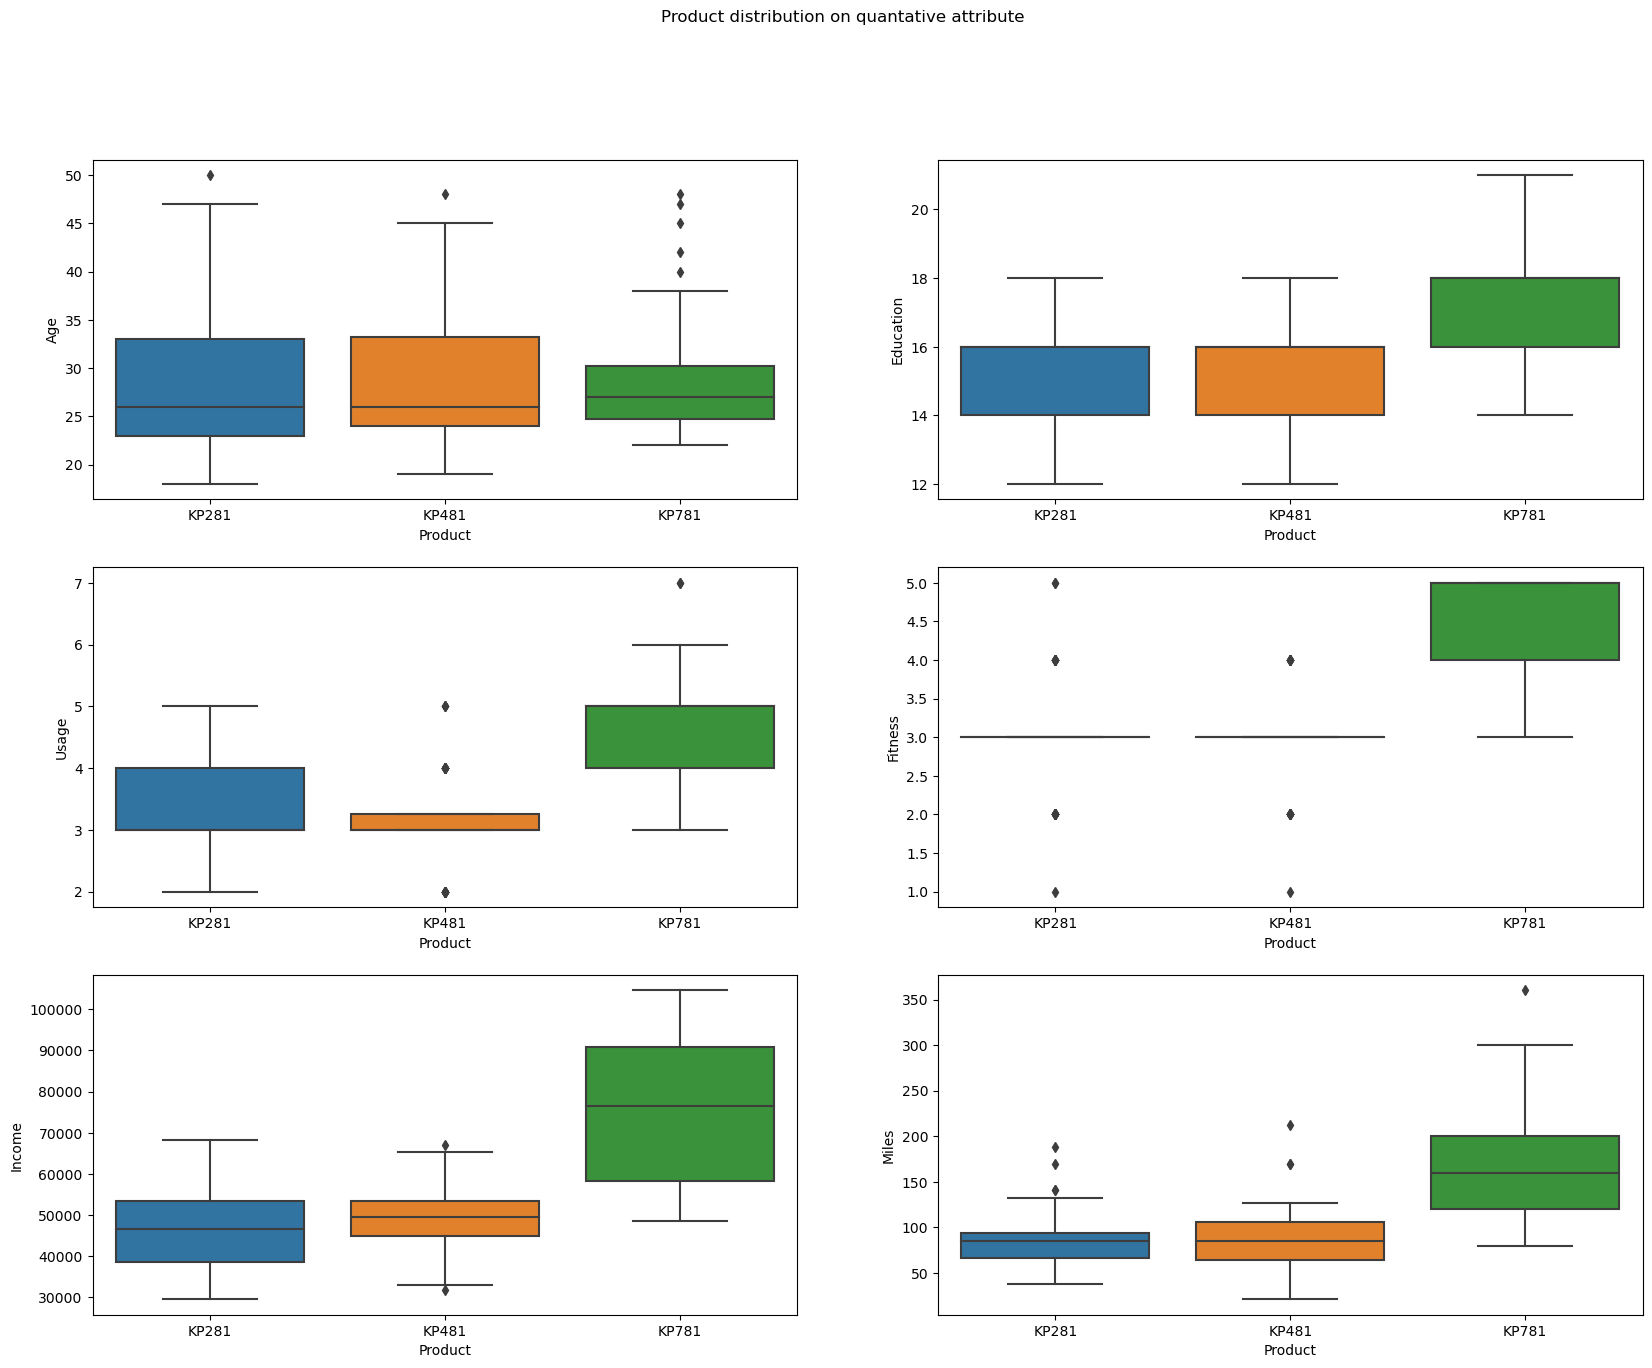

In [30]:
#Product distribution on quantative attribute
fig,ax=plt.subplots(3,2,figsize=(20,15))
fig.suptitle("Product distribution on quantative attribute")

plt.subplot(3,2,1)
sns.boxplot(data=df,x="Product",y="Age")

plt.subplot(3,2,2)
sns.boxplot(data=df,x="Product",y="Education")

plt.subplot(3,2,3)
sns.boxplot(data=df,x="Product",y="Usage")

plt.subplot(3,2,4)
sns.boxplot(data=df,x="Product",y="Fitness")

plt.subplot(3,2,5)
sns.boxplot(data=df,x="Product",y="Income")

plt.subplot(3,2,6)
sns.boxplot(data=df,x="Product",y="Miles")
plt.show()


**insights:**
**Product vs Age:**Both KP281 and KP481 products appear to be popular among customers aged between 22 to 33 years old. On the other hand, KP781 seems to be favored by customers in the 22 to 28 age group, and interestingly, it gains popularity among customers over 40 years old.

**Product vs Education:** Customers who predominantly purchase KP281 and KP481 products tend to have a maximum education level of 16 years. In contrast, those who have pursued higher education, up to 18 years or more, seem to prefer KP781.

**Product vs Usage:** It appears that customers who intend to use the treadmill more frequently, specifically greater than four times a week, are more inclined to purchase the KP781 product. On the other hand, customers with different usage patterns are more likely to opt for KP281 or KP481.

**Product vs Fitness:** Customers who are opting for the KP781 product may be considered to be in better physical fitness compared to those choosing KP281 and KP481. This assumption suggests that KP781 might cater to a more fitness-conscious or health-oriented customer base.

**Product vs Income:** Higher-income customers favor KP781, middle-income customers prefer KP281, and slightly higher middle-income customers opt for KP481, highlighting income's role in product selection.

**Product vs Miles:** KP781 offers the highest mileage range, indicating it's ideal for intense workouts, while KP281 and KP481 are better suited for moderate exercise, helping customers match their fitness goals with the right treadmill.

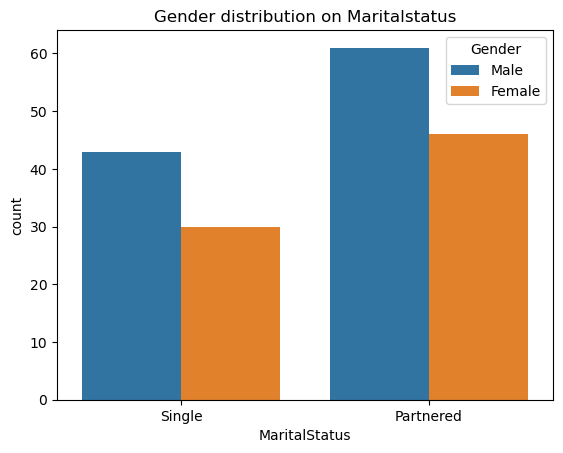

In [31]:
sns.countplot(data=df,x="MaritalStatus",hue="Gender")
plt.title("Gender distribution on Maritalstatus")
plt.show()

In [32]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


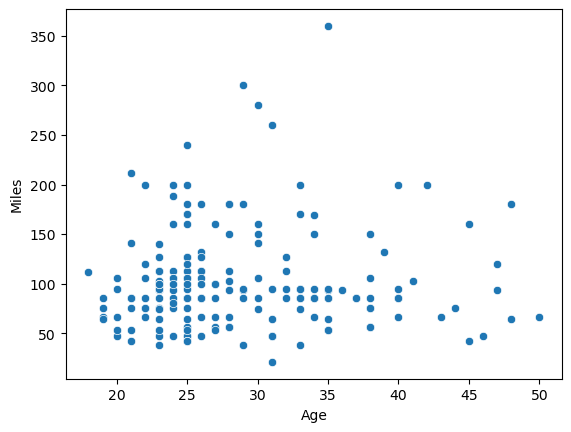

In [33]:
sns.scatterplot(data=df,x="Age",y="Miles")
plt.show()

## **Multivariate Analysis**

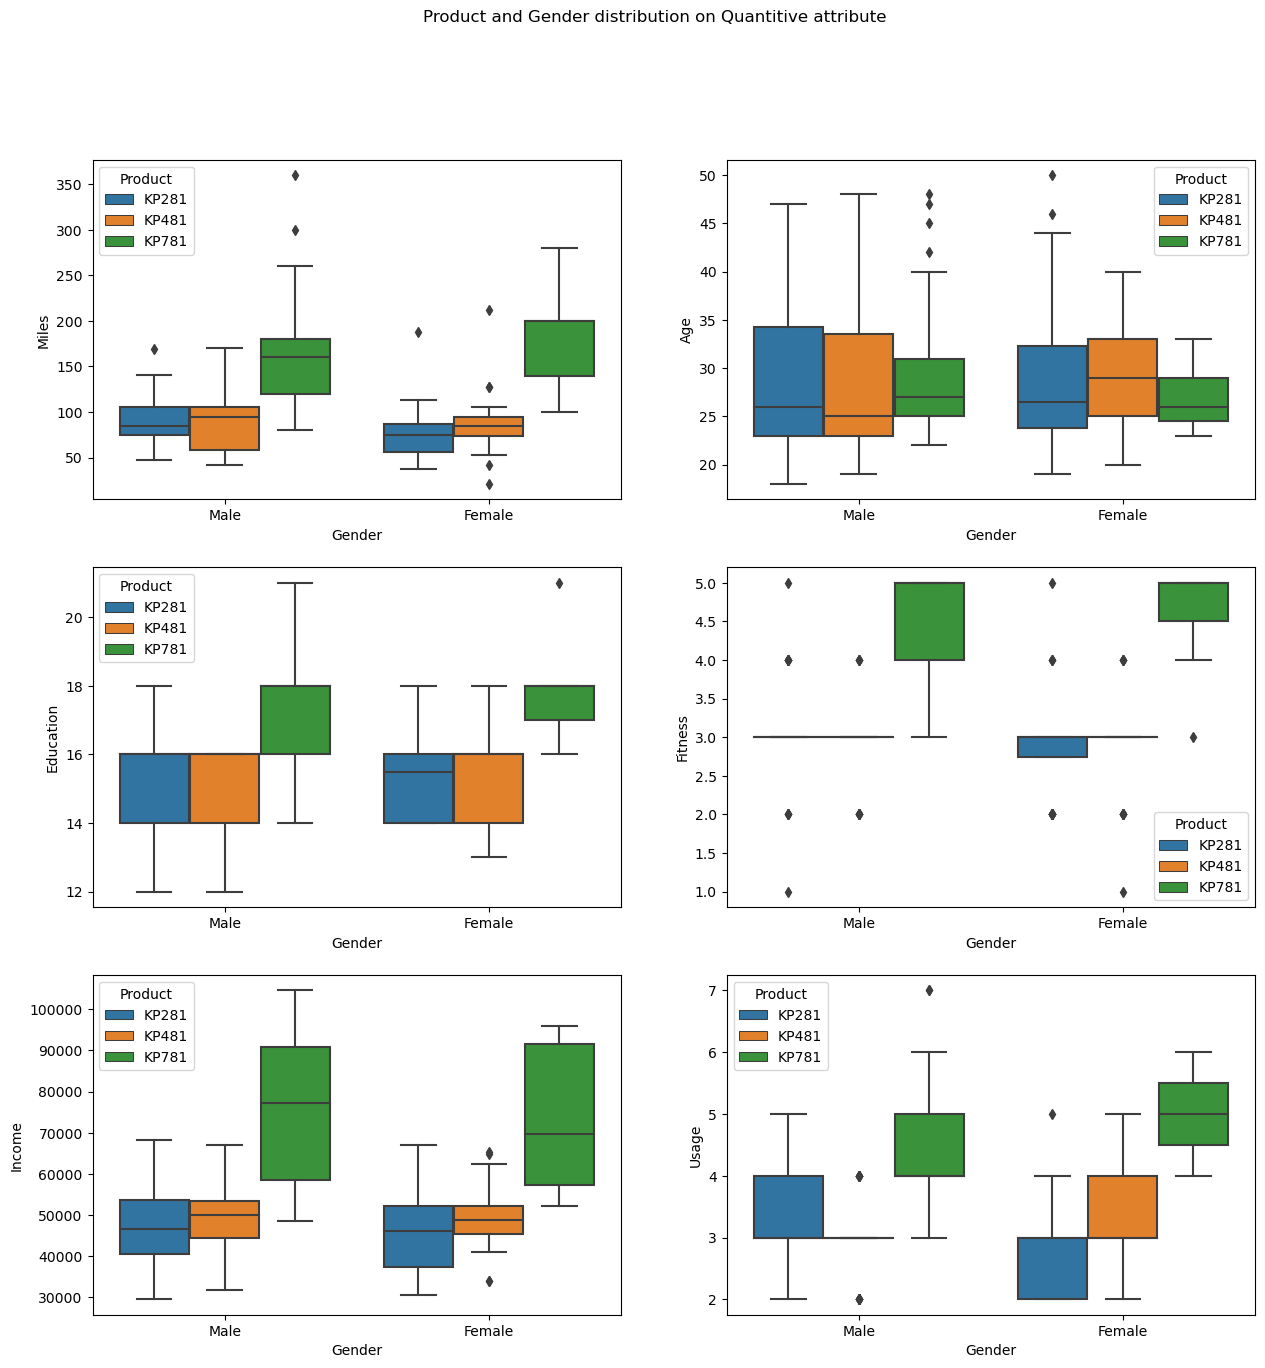

In [34]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Product and Gender distribution on Quantitive attribute")

plt.subplot(3,2,1)
sns.boxplot(data=df,x="Gender",y="Miles",hue="Product")

plt.subplot(3,2,2)
sns.boxplot(data=df,x="Gender",y="Age",hue="Product")

plt.subplot(3,2,3)
sns.boxplot(data=df,x="Gender",y="Education",hue="Product")

plt.subplot(3,2,4)
sns.boxplot(data=df,x="Gender",y="Fitness",hue="Product")

plt.subplot(3,2,5)
sns.boxplot(data=df,x="Gender",y="Income",hue="Product")

plt.subplot(3,2,6)
sns.boxplot(data=df,x="Gender",y="Usage",hue="Product")

plt.show()

# **correlation between all columns**

C:\Users\windows10\AppData\Local\Temp\ipykernel_16444\1405553652.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="magma",annot=True)


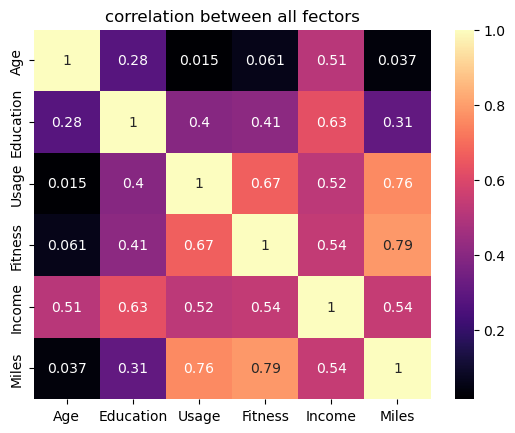

In [35]:
sns.heatmap(df.corr(),cmap="magma",annot=True)
plt.title("correlation between all fectors")
plt.show()

**Insights:**

**Usage and Fitness Connection:** Usage and fitness level exhibit strong positive correlations (0.76 and 0.67, respectively). This implies that individuals who use fitness equipment more frequently tend to have higher fitness levels.

**Income Influence:** Income has notable associations with both education (0.63) and miles covered (0.54). Customers with higher incomes may have pursued more education and might prefer treadmills that offer longer mileage.

**Age's Limited Influence:** Age shows relatively weak correlations with other variables, indicating that age alone may not strongly influence factors like income, fitness, or usage patterns.

**Education's Role:** Education correlates positively with income (0.63) and, to a lesser extent, with fitness and usage (0.41 and 0.4, respectively). This suggests that individuals with higher education levels may earn more and engage in fitness activities.

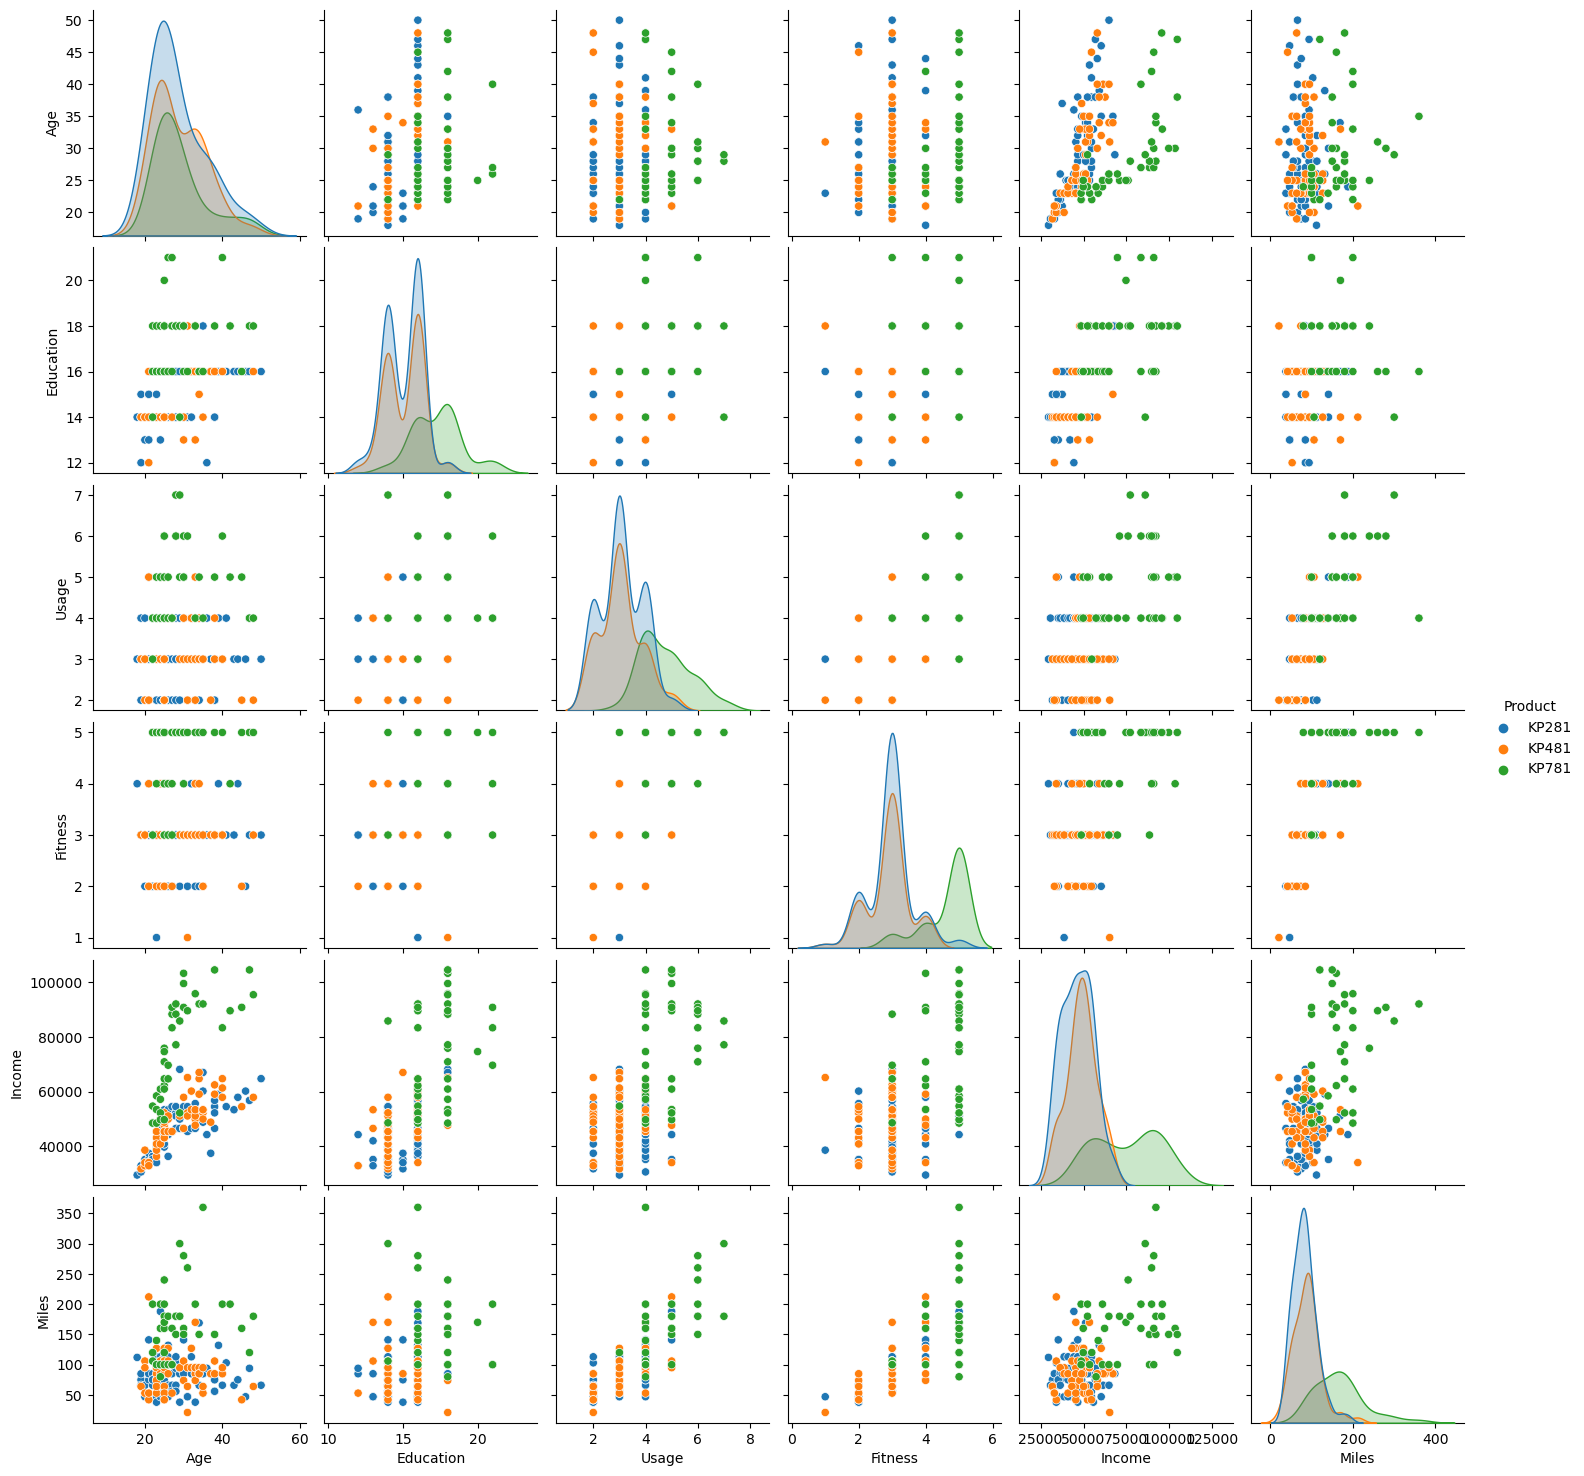

In [36]:
sns.pairplot(data=df,hue="Product")
plt.show()

## **Marginal probability on gender**

In [37]:
#"What is the probability that the customer has purchased 'KP281',KP481,KP781 respectivly?"
df["Product"].value_counts(normalize=True)



KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [38]:
p=pd.crosstab(index=df["Product"],columns=df["Gender"] )
p

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [39]:
#product distributation on gender
p=pd.crosstab(index=df["Product"],columns=df["Gender"],margins=True,normalize=True )
p

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [40]:
#Marginal Probability of a Customer Being Female:
print("Marginal Probability of a Customer Being Female:",((p.loc[:,"Female"].sum())/(p.loc[:,"Female"].sum()+p.loc[:,"Male"].sum())).round(4))

Marginal Probability of a Customer Being Female: 0.4222


In [41]:
#Marginal Probability of a Customer Being Male:
print("Marginal Probability of a Customer Being Male:",((p.loc[:,"Male"].sum())/(p.loc[:,"Female"].sum()+p.loc[:,"Male"].sum())).round(4))

Marginal Probability of a Customer Being Male: 0.5778


**Insights:**The marginal probabilities indicate that there are more male customers (57.78%) than female customers (42.22%), suggesting a higher representation of males in the customer base.






## **Conditional probability on gender**

In [42]:
#Conditional Probability of a Female Customer Purchasing KP281,KP481,KP781 respectivly:
print("Conditional Probability of a Female Customer Purchasing KP281 (KP281|Female):",(p.loc["KP281","Female"]/p.loc["All" ,"Female"].sum()).round(4))
print("Conditional Probability of a Female Customer Purchasing KP481 (KP481|Female):",(p.loc["KP481","Female"]/p.loc["All","Female"].sum()).round(4))
print("Conditional Probability of a Female Customer Purchasing KP781 (KP781|Female):",(p.loc["KP781","Female"]/p.loc["All" ,"Female"].sum()).round(4))


Conditional Probability of a Female Customer Purchasing KP281 (KP281|Female): 0.5263
Conditional Probability of a Female Customer Purchasing KP481 (KP481|Female): 0.3816
Conditional Probability of a Female Customer Purchasing KP781 (KP781|Female): 0.0921


In [43]:
#Conditional Probability of a Male Customer Purchasing KP281,KP481,KP781 respectivly:
print("Conditional Probability of a Male Customer Purchasing KP281 (KP281|Male):",(p.loc["KP281","Male"]/p.loc["All" ,"Female"].sum()).round(4))
print("Conditional Probability of a Male Customer Purchasing KP481 (KP481|Male):",(p.loc["KP481","Male"]/p.loc["All","Female"].sum()).round(4))
print("Conditional Probability of a Male Customer Purchasing KP781 (KP781|Male):",(p.loc["KP781","Male"]/p.loc["All","Female"].sum()).round(4))


Conditional Probability of a Male Customer Purchasing KP281 (KP281|Male): 0.5263
Conditional Probability of a Male Customer Purchasing KP481 (KP481|Male): 0.4079
Conditional Probability of a Male Customer Purchasing KP781 (KP781|Male): 0.4342


**Insights:**The conditional probabilities for both female and male customers indicate that KP281 has an equal likelihood of being chosen by both genders, while KP481 is slightly more preferred by females, and KP781 is somewhat favored by males. These insights suggest gender-specific tendencies in treadmill choice.






## **Marginal Probability on Income**

In [44]:
df["Income"].min()

29562

In [45]:
df["Income"].mean()

53719.57777777778

In [46]:
df["Income"].max()

104581

In [47]:
i=pd.crosstab(index=df["Product"],columns=df["Income"]<df["Income"].mean(),margins=True)
i

Income,False,True,All
Product,,,
KP281,18,62,80
KP481,13,47,60
KP781,32,8,40
All,63,117,180


In [48]:
a=pd.crosstab(index=df["Product"],columns=df["Income"]<df["Income"].mean(),margins=True,normalize=True)
a

Income,False,True,All
Product,,,
KP281,0.100000,0.344444,0.444444
KP481,0.072222,0.261111,0.333333
KP781,0.177778,0.044444,0.222222
All,0.350000,0.650000,1.000000


In [49]:
#False=greater than mean,True=less than mean

In [50]:
#Marginal Probability of Income being greater than mean:
print("Marginal Probability of Income being greater than mean:",a.loc["All",False]/(a.loc["All",False]+a.loc["All",True]))

Marginal Probability of Income being greater than mean: 0.35


In [51]:
#Marginal Probability of Income being less than mean:
print("Marginal Probability of Income being less than mean:",a.loc["All",True]/(a.loc["All","All"]))

Marginal Probability of Income being less than mean: 0.65


In [52]:
#Marginal Probability of Product KP281,KP481,KP781 being purchased respectivly:
print("Marginal Probability of Product KP281 being purchased P(KP281):",(a.loc["KP281","All"]/(a.loc["All","All"])).round(4))
print("Marginal Probability of Product KP481 being purchased P(KP481):",(a.loc["KP481","All"]/(a.loc["All","All"])).round(4))
print("Marginal Probability of Product KP781 being purchased P(KP781):",(a.loc["KP781","All"]/(a.loc["All","All"])).round(4))

Marginal Probability of Product KP281 being purchased P(KP281): 0.4444
Marginal Probability of Product KP481 being purchased P(KP481): 0.3333
Marginal Probability of Product KP781 being purchased P(KP781): 0.2222


**insight:**The marginal probability of income being greater than the mean (35%) suggests a portion of customers have above-average incomes, while the varying probabilities for treadmill products (KP281, KP481, and KP781) indicate differing levels of preference within the customer base, with KP281 being the most popular.

** **bold text**Conditional Probability of Income**

In [53]:
#Conditional Probability of Income being greater than mean given the purchase of KP281,KP481,KP781 respectivly:
print("Conditional Probability of Income being greater than mean given the purchase of KP281 P(Graeter than mean|KP281):",(a.loc["KP281",False]/a.loc["KP281","All"]).round(4))
print("Conditional Probability of Income being greater than mean given the purchase of KP481 P(Graeter than mean|KP481):",(a.loc["KP481",False]/a.loc["KP481","All"]).round(4))
print("Conditional Probability of Income being greater than mean given the purchase of KP781 P(Graeter than mean|KP781):",(a.loc["KP781",False]/a.loc["KP781","All"]).round(4))

Conditional Probability of Income being greater than mean given the purchase of KP281 P(Graeter than mean|KP281): 0.225
Conditional Probability of Income being greater than mean given the purchase of KP481 P(Graeter than mean|KP481): 0.2167
Conditional Probability of Income being greater than mean given the purchase of KP781 P(Graeter than mean|KP781): 0.8


In [54]:
#Conditional Probability of Income being less than mean given the purchase of KP281,KP481,KP781 respectivly:
print("Conditional Probability of Income being less than mean given the purchase of KP281 P(less than mean|KP281):",(a.loc["KP281",True]/a.loc["KP281","All"]).round(4))
print("Conditional Probability of Income being less than mean given the purchase of KP481 P(less than mean|KP481):",(a.loc["KP481",True]/a.loc["KP481","All"]).round(4))
print("Conditional Probability of Income being less than mean given the purchase of KP781 P(less than mean|KP781):",(a.loc["KP781",True]/a.loc["KP781","All"]).round(4))

Conditional Probability of Income being less than mean given the purchase of KP281 P(less than mean|KP281): 0.775
Conditional Probability of Income being less than mean given the purchase of KP481 P(less than mean|KP481): 0.7833
Conditional Probability of Income being less than mean given the purchase of KP781 P(less than mean|KP781): 0.2


**Insights:** The conditional probabilities suggest that customers who purchase KP781 are more likely to have incomes greater than the mean (80%), while those selecting KP281 and KP481 are more likely to have incomes below the mean (77.5% and 78.33%, respectively). These insights indicate income disparities in product choices, with KP781 appealing to a higher-income segment.






**Recommendations:**

1. **Targeted Marketing**: Given the insights regarding product preferences among different demographics (such as gender, income, and age), consider tailoring your marketing strategies. For instance, focus marketing efforts for KP281 towards females and lower-income customers, while emphasizing KP781 for higher-income and possibly male customers.

2. **Product Development**: Use the data on product preferences and conditional probabilities to guide product development. If KP281 is popular among certain groups, consider enhancing its features or affordability for wider appeal. For KP781, explore ways to cater to higher-income customers' fitness needs.

3. **Pricing Strategies**: Based on the correlations between income and product choices, you might adjust pricing strategies to align with customer income levels. Offering different pricing tiers or financing options could attract a broader customer base.

4. **Education and Engagement**: Leverage the correlation between education and product preferences. Consider educational content or engagement strategies targeted at customers with higher education levels, potentially focusing on the benefits of specific products.

5. **Customer Segmentation**: Use the provided data to create customer segments and design personalized marketing campaigns or product bundles for each segment. This can enhance customer engagement and increase sales.

6. **Inventory Management**: Ensure that you have appropriate inventory levels for each product based on their popularity among different demographics. This can help optimize stock management and reduce carrying costs.

